In [1]:
from chesslab.agent_tf import agent
from chesslab.agent_stockfish import agent as s_agent
from chesslab.tests import kaufman_test
import chess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import tensorflow as tf
class Model_1():

    def __init__(self,
                   n_classes=2):
        initializer = tf.keras.initializers.GlorotNormal()
        self.hw=[]
        self.hb=[]

        self.hw.append( tf.Variable(initializer(shape=(7,7,3,32),dtype=np.float32),name="hl1weigths",dtype="float32") )
        self.hb.append( tf.Variable(np.zeros(32,dtype=np.float32),name="hl1bias",dtype="float32") )
        #8x8x32
        self.hw.append( tf.Variable(initializer(shape=(5,5,32,64),dtype=np.float32),name="hl2weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(64,dtype=np.float32),name="hl2bias",dtype="float32"))
        #8x8x64
        self.hw.append( tf.Variable(initializer(shape=(3,3,64,128),dtype=np.float32),name="hl3weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(128,dtype=np.float32),name="hl3bias",dtype="float32"))
        #8x8x128
        self.hw.append( tf.Variable(initializer(shape=(8*8*128,256),dtype=np.float32),name="hl4weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(256,dtype=np.float32),name="hl4bias",dtype="float32"))

        self.hw.append( tf.Variable(initializer(shape=(256, n_classes),dtype=np.float32),name="outweigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(n_classes,dtype=np.float32),name="outbias",dtype="float32"))

        self.trainable_variables = []
        for i in range(len(self.hw)):
            self.trainable_variables.append(self.hw[i])    
            self.trainable_variables.append(self.hb[i])

    def __call__(self,x): 

        # Declarando la arquitectura
        out = tf.cast(x, tf.float32)
        out = tf.reshape(out, shape=[-1, 8, 8, 3])

        layer=0
        out = tf.add(out, 1e-8)
        out = tf.nn.conv2d(out,self.hw[layer], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.elu(out)
              #8*8*32
        layer+=1
        out = tf.nn.conv2d(out,self.hw[layer], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.elu(out)
              #8*8*64
        layer+=1  
        out = tf.nn.conv2d(out,self.hw[layer], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.elu(out)
              #8*8*128
        layer+=1
        out =  tf.reshape(out,[-1, 8*8*128])
        out =  tf.matmul(out,self.hw[layer])
        out = tf.add(out, self.hb[layer])
        out = tf.nn.elu(out)

        layer+=1
        out =  tf.matmul(out,self.hw[layer])
        out = tf.add(out, self.hb[layer])

        return out
model = Model_1()

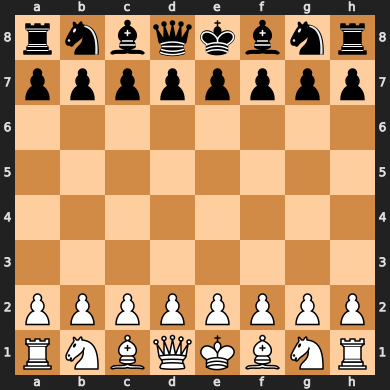

In [3]:
board=chess.Board()
board

In [4]:
base_name = './tmp/tf_weights-elo3.0.{}.h5'
deepbot = agent(model,base_name.format(1))
move=deepbot.select_move(board)
move

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Move.from_uci('e2e4')

In [5]:
moves,values=deepbot.get_move_values(board)

In [6]:
moves

[Move.from_uci('g1h3'),
 Move.from_uci('g1f3'),
 Move.from_uci('b1c3'),
 Move.from_uci('b1a3'),
 Move.from_uci('h2h3'),
 Move.from_uci('g2g3'),
 Move.from_uci('f2f3'),
 Move.from_uci('e2e3'),
 Move.from_uci('d2d3'),
 Move.from_uci('c2c3'),
 Move.from_uci('b2b3'),
 Move.from_uci('a2a3'),
 Move.from_uci('h2h4'),
 Move.from_uci('g2g4'),
 Move.from_uci('f2f4'),
 Move.from_uci('e2e4'),
 Move.from_uci('d2d4'),
 Move.from_uci('c2c4'),
 Move.from_uci('b2b4'),
 Move.from_uci('a2a4')]

In [7]:
values

array([0.63409513, 0.6888144 , 0.6634481 , 0.56719923, 0.5653796 ,
       0.6127137 , 0.5757039 , 0.6080689 , 0.55322695, 0.51354563,
       0.52848804, 0.636176  , 0.59351397, 0.64531386, 0.65516245,
       0.69247806, 0.5865514 , 0.5766844 , 0.5693254 , 0.6256139 ],
      dtype=float32)

In [8]:
from chesslab.utils import join_and_sort
join_and_sort(moves,values)

array([[Move.from_uci('e2e4'), 0.6924780607223511],
       [Move.from_uci('g1f3'), 0.6888144016265869],
       [Move.from_uci('b1c3'), 0.6634480953216553],
       [Move.from_uci('f2f4'), 0.6551624536514282],
       [Move.from_uci('g2g4'), 0.6453138589859009],
       [Move.from_uci('a2a3'), 0.6361759901046753],
       [Move.from_uci('g1h3'), 0.6340951323509216],
       [Move.from_uci('a2a4'), 0.6256139278411865],
       [Move.from_uci('g2g3'), 0.6127136945724487],
       [Move.from_uci('e2e3'), 0.6080688834190369],
       [Move.from_uci('h2h4'), 0.5935139656066895],
       [Move.from_uci('d2d4'), 0.5865514278411865],
       [Move.from_uci('c2c4'), 0.5766844153404236],
       [Move.from_uci('f2f3'), 0.5757039189338684],
       [Move.from_uci('b2b4'), 0.5693253874778748],
       [Move.from_uci('b1a3'), 0.5671992301940918],
       [Move.from_uci('h2h3'), 0.5653796195983887],
       [Move.from_uci('d2d3'), 0.5532269477844238],
       [Move.from_uci('b2b3'), 0.528488039970398],
       [Move.

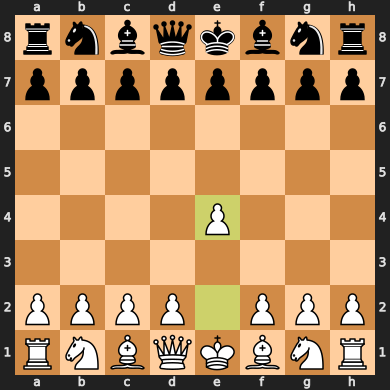

In [9]:
board.push(move)
board

In [10]:
kaufman_test(deepbot)

0.16

In [11]:
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 4/25 = 0.16 | weighted = 0.59
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 12 & 48 & 0.7660 & 0.8608 & c1c7 & 0.9112  \\
02 & f5d4 & 38 & 39 & 0.0263 & 0.2699 & a5e5 & 0.5192  \\
03 & e1d1 & 23 & 38 & 0.4054 & 0.7408 & f2f7 & 0.8422  \\
04 & b1b2 & 39 & 47 & 0.1739 & 0.7596 & h2h4 & 0.8589  \\
05 & g5c1 & 15 & 48 & 0.7021 & 0.3836 & c8c3 & 0.5242  \\
06 & a3a2 & 1 & 31 & 1.0000 & 0.4676 & a3a2 & 0.4676  \\
07 & b7e4 & 5 & 33 & 0.8750 & 0.4724 & g7g5 & 0.5064  \\
08 & h7h6 & 12 & 39 & 0.7105 & 0.4397 & e1e3 & 0.5515  \\
09 & f3e2 & 21 & 35 & 0.4118 & 0.6332 & d2g5 & 0.7059  \\
10 & d5c3 & 40 & 41 & 0.0250 & 0.2424 & c7h2 & 0.4177  \\
11 & g3f5 & 2 & 35 & 0.9706 & 0.7918 & c7d6 & 0.8378  \\
12 & c6d6 & 18 & 41 & 0.5750 & 0.3861 & e7e3 & 0.5253  \\
13 & c3d5 & 5 & 30 & 0.8621 & 0.8518 & f1f6 & 0.9577  \\
14 & b1b2 & 45 & 49 & 0.0833 & 0.5891 & d3d8 & 0.7852  \\
15 & d3f5 & 29 & 51 & 0.4400 & 0.6899 & h2h4 & 0.7992  \\
16 & b3b4 & 7 & 10 & 0.3333 & 0.354

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.860829,c1c7,0.911176,12,48,0.765957
1,f5d4,0.269910,a5e5,0.519233,38,39,0.026316
2,e1d1,0.740822,f2f7,0.842158,23,38,0.405405
3,b1b2,0.759630,h2h4,0.858870,39,47,0.173913
4,g5c1,0.383634,c8c3,0.524188,15,48,0.702128
5,a3a2,0.467569,a3a2,0.467569,1,31,1.000000
6,b7e4,0.472353,g7g5,0.506436,5,33,0.875000
7,h7h6,0.439668,e1e3,0.551501,12,39,0.710526
8,f3e2,0.633198,d2g5,0.705907,21,35,0.411765
9,d5c3,0.242388,c7h2,0.417740,40,41,0.025000


In [12]:
epochs=40
exact_acc = np.zeros(epochs)
weighted_acc = np.zeros(epochs)
train_acc_model = np.zeros(epochs)
test_acc_model = np.zeros(epochs)
for i in range(1,epochs+1):
    deepbot = agent(model,base_name.format(i))
    acc,acc_w,_  = kaufman_test(deepbot,details=1)
    exact_acc[i-1]=acc
    weighted_acc[i-1]=acc_w
    train_acc_model[i-1] = deepbot.history['train']['acc'][-1]
    test_acc_model[i-1] = deepbot.history['test']['acc'][-1]


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GP

In [13]:
path = 'E:/database/stockfish_14.exe'
stockfish = s_agent(path)
ss,ssp,_  = kaufman_test(stockfish,details=1)
print("Exactitud para función de stockfish usando prueba de Kaufman y prueba de Kaufman ponderada\n {} | {:.2f}".format(ss,ssp))
ss = np.repeat(ss,epochs)
ssp = np.repeat(ssp,epochs)

Exactitud para función de stockfish usando prueba de Kaufman y prueba de Kaufman ponderada
 0.24 | 0.61


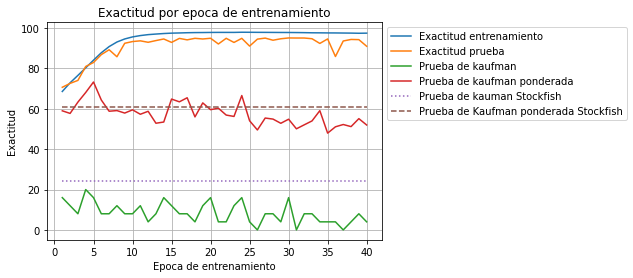

In [14]:
x = np.arange(epochs)+1
plt.plot(x,train_acc_model*100)
plt.plot(x,test_acc_model*100)
plt.plot(x,exact_acc*100)
plt.plot(x,weighted_acc*100)
plt.plot(x,ss*100,linestyle='dotted')
plt.plot(x,ssp*100,linestyle='dashed')
plt.title('Exactitud por epoca de entrenamiento')
plt.xlabel('Epoca de entrenamiento')
plt.ylabel('Exactitud')
plt.legend(['Exactitud entrenamiento','Exactitud prueba','Prueba de kaufman','Prueba de kaufman ponderada','Prueba de kauman Stockfish','Prueba de Kaufman ponderada Stockfish'],bbox_to_anchor=(1, 1),loc=2)
plt.grid()
plt.savefig('grafica.png',bbox_inches="tight")
plt.show()

In [15]:
train_acc_model

array([0.6860491 , 0.72902876, 0.76575881, 0.80311286, 0.84120905,
       0.87797171, 0.90845799, 0.93115109, 0.94633448, 0.95646483,
       0.96306026, 0.96775043, 0.9706192 , 0.97320318, 0.97508633,
       0.97602224, 0.97721213, 0.97788703, 0.97816229, 0.97862542,
       0.97884512, 0.97879708, 0.97877496, 0.97958058, 0.97941768,
       0.97908276, 0.97893864, 0.97868013, 0.97845876, 0.97833306,
       0.97803903, 0.97756922, 0.97686088, 0.97664201, 0.9762553 ,
       0.97609866, 0.9756819 , 0.97531855, 0.97452921, 0.97508758])

In [16]:
print('Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\\\')
print(' & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\\\')
for i in range(epochs):
    print('{:02d} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\'.format(i+1,100*train_acc_model[i],100*test_acc_model[i],100*exact_acc[i],100*weighted_acc[i]))
data = np.stack((train_acc_model,test_acc_model,exact_acc,weighted_acc),axis=1)
pd.DataFrame(data,index=x,columns=["Conjunto de entrenamiento","Conjunto de prueba","Prueba de kaufman","Prueba de kaufman ponderada"])

Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\
 & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\
01 & 68.60 & 70.68 & 16.00 & 59.03 \\
02 & 72.90 & 72.62 & 12.00 & 57.73 \\
03 & 76.58 & 74.09 & 8.00 & 63.34 \\
04 & 80.31 & 80.99 & 20.00 & 68.10 \\
05 & 84.12 & 82.97 & 16.00 & 73.30 \\
06 & 87.80 & 86.88 & 8.00 & 64.37 \\
07 & 90.85 & 89.28 & 8.00 & 58.82 \\
08 & 93.12 & 85.82 & 12.00 & 59.13 \\
09 & 94.63 & 92.49 & 8.00 & 57.91 \\
10 & 95.65 & 93.35 & 8.00 & 59.51 \\
11 & 96.31 & 93.70 & 12.00 & 57.32 \\
12 & 96.78 & 92.98 & 4.00 & 58.78 \\
13 & 97.06 & 93.83 & 8.00 & 52.87 \\
14 & 97.32 & 94.62 & 16.00 & 53.47 \\
15 & 97.51 & 92.92 & 12.00 & 64.85 \\
16 & 97.60 & 94.91 & 8.00 & 63.48 \\
17 & 97.72 & 94.19 & 8.00 & 65.49 \\
18 & 97.79 & 94.95 & 4.00 & 56.01 \\
19 & 97.82 & 94.62 & 12.00 & 62.94 \\
20 & 97.86 & 94.98 & 16.00 & 59.59 \\
21 & 97.88 & 92.14 & 4.00 & 60.31 \\
22 & 97.88 & 94.95 & 4.00 & 56.92 \\
23 & 97.88 & 92.90 & 12.00 & 56.23 \\
24 & 97.96 & 94.94

,Conjunto de entrenamiento,Conjunto de prueba,Prueba de kaufman,Prueba de kaufman ponderada
1,0.686049,0.706848,0.16,0.590274
2,0.729029,0.726153,0.12,0.577343
3,0.765759,0.740888,0.08,0.633389
4,0.803113,0.809877,0.20,0.681027
5,0.841209,0.829738,0.16,0.732950
6,0.877972,0.868807,0.08,0.643732
7,0.908458,0.892777,0.08,0.588151
8,0.931151,0.858181,0.12,0.591341
9,0.946334,0.924888,0.08,0.579083
10,0.956465,0.933469,0.08,0.595057
